In [ ]:
!pip install pycaret

In [2]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/meteorological_models/distan_lat42.39707lon-8.69362p4R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [3]:
import pandas as pd
station=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/meteorological_stations/marin.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
print(station.head(15))

                     prec
time                     
2021-03-11 00:10:00   0.0
2021-03-11 00:20:00   0.1
2021-03-11 00:30:00   0.0
2021-03-11 00:40:00   0.0
2021-03-11 00:50:00   0.1
2021-03-11 01:00:00   0.1
2021-03-11 01:10:00   0.2
2021-03-11 01:20:00   0.1
2021-03-11 01:30:00   0.4
2021-03-11 01:40:00   0.3
2021-03-11 01:50:00   0.4
2021-03-11 02:00:00   0.4
2021-03-11 02:10:00   0.1
2021-03-11 02:20:00   0.0
2021-03-11 02:30:00   0.0


In [5]:
#resample prec accumulated hour before
station=station.resample("H",label="right").sum()
station

,prec
time,
2021-03-11 02:00:00,0.2
2021-03-11 03:00:00,1.5
2021-03-11 04:00:00,0.5
2021-03-11 05:00:00,0.0
2021-03-11 06:00:00,0.0
...,...
2022-02-19 07:00:00,0.0
2022-02-19 08:00:00,0.0
2022-02-19 09:00:00,0.0


In [6]:
from locale import normalize
station["prec"].astype("int").value_counts()

0     7992
1      149
2       59
3       28
4       20
5       14
6        6
7        6
9        4
10       3
8        3
13       2
23       1
18       1
16       1
11       1
Name: prec, dtype: int64

In [7]:
#prec to interval
interval=pd.IntervalIndex.from_tuples([(-0.1,0.1), (0.1, 400)])
labels=['no precipitación', 'precipitación']
station["prec_l"]=pd.cut(station["prec"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
station.sample(20)

,prec,prec_l
time,,
2021-04-18 08:00:00,0.0,no precipitación
2022-01-22 11:00:00,0.0,no precipitación
2021-10-18 06:00:00,0.0,no precipitación
2021-12-24 04:00:00,0.0,no precipitación
2021-12-24 09:00:00,0.0,no precipitación
2021-07-15 08:00:00,0.0,no precipitación
2021-08-20 07:00:00,0.0,no precipitación
2021-08-30 09:00:00,0.0,no precipitación
2021-10-26 02:00:00,0.0,no precipitación


**Forecast D1**

In [41]:
#ria forecast d1
ria_model4k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/meteorological_models/lat42.39707lon-8.69362p4R4KmD1.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
ria_model4k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,lwflx0,conv_prec0,prec0,swflx0,shflx0,cape0,cin0,cfh0,cfl0,cfm0,cft0,HGT5000,HGT8500,T5000,T8500,dir1,snow_prec1,snowlevel1,mod1,wind_gust1,mslp1,temp1,rh1,visibility1,lhflx1,lwflx1,conv_prec1,prec1,swflx1,shflx1,...,lwflx2,conv_prec2,prec2,swflx2,shflx2,cape2,cin2,cfh2,cfl2,cfm2,cft2,HGT5002,HGT8502,T5002,T8502,dir3,snow_prec3,snowlevel3,mod3,wind_gust3,mslp3,temp3,rh3,visibility3,lhflx3,lwflx3,conv_prec3,prec3,swflx3,shflx3,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-03-12 00:00:00,232.333237,0.0,1238.289307,0.612937,1.118462,102588.828125,281.699554,0.991256,24044.080078,-0.802945,283.048645,0.0,0.09,0.0,-6.664160,67.940002,-2.192203,0.000000,0.100000,0.0,0.100000,5599.741211,1522.900879,253.979691,273.308868,264.108093,0.0,1230.879150,1.895199,3.418462,102570.945312,284.670563,0.861756,24044.080078,30.797054,279.848633,0.0,0.00,0.0,9.235840,...,284.148621,0.0,0.06,0.0,-10.764160,55.310001,-6.534203,0.000000,0.200000,0.0,0.200000,5602.148926,1527.408081,254.019684,273.257874,265.571533,0.0,1222.713379,0.576910,1.018462,102570.945312,281.149567,0.992656,24044.080078,-1.302945,274.248627,0.0,0.00,0.0,-8.464160,70.870003,-1.330203,0.000000,0.300000,0.0,0.300000,5598.117188,1522.377686,253.991684,273.149872
2021-03-12 01:00:00,260.577728,0.0,1184.147095,1.462863,2.700714,102537.101562,281.220551,0.996891,24055.048828,-1.579407,275.905151,0.0,0.02,0.0,-8.993457,88.180000,-1.466703,0.000000,0.800000,0.0,0.800000,5591.026855,1519.641846,253.985306,272.765930,275.916992,0.0,1209.676758,2.818141,3.500714,102525.757812,284.427551,0.873591,24055.048828,38.520592,354.405151,0.0,0.04,0.0,13.206543,...,283.905151,0.0,0.08,0.0,-12.593457,74.400002,-4.703703,0.000000,0.460000,0.0,0.460000,5593.170898,1524.472290,253.955307,273.101929,291.211884,0.0,1217.016846,0.968761,1.800714,102544.562500,280.720551,0.999991,24055.048828,-2.079407,274.505157,0.0,0.01,0.0,-9.293457,87.940002,-1.036703,0.000000,0.510000,0.0,0.510000,5588.875000,1519.560303,253.895309,273.118927
2021-03-12 02:00:00,283.666260,0.0,1182.647827,1.125598,2.065111,102522.640625,281.150055,0.999974,24045.392578,-1.893233,290.668854,0.0,0.18,0.0,-7.454858,105.900002,-0.842238,0.000000,0.288040,0.0,0.288040,5582.190918,1516.412354,253.495071,272.883301,296.459015,0.0,1174.760620,2.863693,4.565111,102509.054688,284.175049,0.889574,24045.392578,40.206768,294.868835,0.0,0.18,0.0,15.745142,...,285.368835,0.0,0.08,0.0,-10.754858,92.139999,-3.715238,0.000000,0.270744,0.0,0.270744,5584.499023,1521.161255,253.515076,272.788300,308.251984,0.0,1173.648193,1.430964,5.465111,102514.656250,280.419067,0.999974,24045.392578,-2.593233,273.468842,0.0,0.00,0.0,-10.054858,101.949997,-1.312238,0.000000,0.311410,0.0,0.311410,5580.415039,1516.122803,253.495071,272.793304
2021-03-12 03:00:00,296.238556,0.0,1136.875366,0.959959,6.050231,102501.906250,280.873810,1.000000,24046.484375,-1.710521,298.520538,0.0,0.20,0.0,-6.725806,101.430000,-3.030316,0.000000,0.288960,0.0,0.288960,5570.059082,1512.518066,253.214569,272.501312,299.981079,0.0,1139.205566,3.810993,5.750231,102489.085938,284.012817,0.875700,24046.484375,53.589478,309.220520,0.0,0.14,0.0,21.074194,...,283.620544,0.0,0.04,0.0,-12.725805,90.650002,-4.766316,0.000000,0.000000,0.0,0.000000,5572.050781,1517.175659,253.204575,272.571320,301.154907,0.0,1151.184326,1.999419,6.150231,102492.320312,280.145813,0.998000,24046.484375,-2.010521,271.020538,0.0,0.00,0.0,-10.925806,73.650002,-3.534316,0.000000,0.000000,0.0,0.000000,5567.827148,1511.868530,253.144577,272.663300
2021-03-12 04:00:00,308.564758,0.0,1096.920288,0.800500,1.477510,102468.609375,280.430634,0.999996,24044.431641,-1.698671,277.796265,0.0,0.10,0.0,-7.576367,106.349998,-4.715379,0.000000,0.309499,0.0,0.309499,5558.646973,1508.305542,252.673676,272.247803,317.230469,0.0,1095.980347,3.690319,4.377510,102449.5703

In [42]:
#label meteorological model prec points 0 , 1, 2 and 3
ria_model4k["prec0_l"]=pd.cut(ria_model4k["prec0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["prec1_l"]=pd.cut(ria_model4k["prec1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["prec2_l"]=pd.cut(ria_model4k["prec2"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["prec3_l"]=pd.cut(ria_model4k["prec3"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
df_all4k=pd.concat([station,ria_model4k],axis=1).dropna()
df_all4k=df_all4k.drop(columns=["prec"])
df_all4k[["prec_l","prec0_l","prec1_l","prec2_l","prec3_l"]].sample(20)


,prec_l,prec0_l,prec1_l,prec2_l,prec3_l
time,,,,,
2021-08-01 06:00:00,no precipitación,no precipitación,no precipitación,no precipitación,no precipitación
2022-02-15 10:00:00,precipitación,no precipitación,no precipitación,no precipitación,precipitación
2021-09-13 06:00:00,no precipitación,no precipitación,no precipitación,no precipitación,no precipitación
2021-03-30 15:00:00,no precipitación,no precipitación,no precipitación,precipitación,no precipitación
2021-06-29 03:00:00,no precipitación,precipitación,no precipitación,no precipitación,no precipitación
2022-01-22 13:00:00,no precipitación,no precipitación,no precipitación,no precipitación,no precipitación
2021-07-26 13:00:00,no precipitación,no precipitación,no precipitación,no precipitación,no precipitación
2021-06-19 20:00:00,no precipitación,no precipitación,no precipitación,no precipitación,no precipitación
2021-12-20 15:00:00,no precipitación,no precipitación,no precipitación,no precipitación,no precipitación


In [13]:
#compare model points and stations
print("station:\n",df_all4k["prec_l"].value_counts())
print("model point0:\n",df_all4k["prec0_l"].value_counts())
print("model point1:\n",df_all4k["prec1_l"].value_counts())
print("model point2:\n",df_all4k["prec2_l"].value_counts())
print("model point3:\n",df_all4k["prec3_l"].value_counts())


station:
 no precipitación    7595
precipitación        673
Name: prec_l, dtype: int64
model point0:
 no precipitación    7154
precipitación       1114
Name: prec0_l, dtype: int64
model point1:
 no precipitación    7039
precipitación       1229
Name: prec1_l, dtype: int64
model point2:
 no precipitación    7051
precipitación       1217
Name: prec2_l, dtype: int64
model point3:
 no precipitación    6927
precipitación       1341
Name: prec3_l, dtype: int64


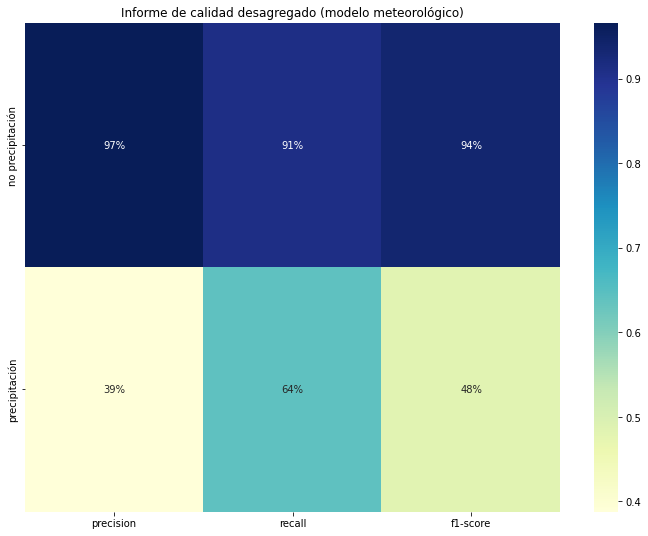

In [14]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Informe de calidad desagregado (modelo meteorológico)")
#report point 0
cr=pd.DataFrame(classification_report(df_all4k.prec_l, df_all4k.prec0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


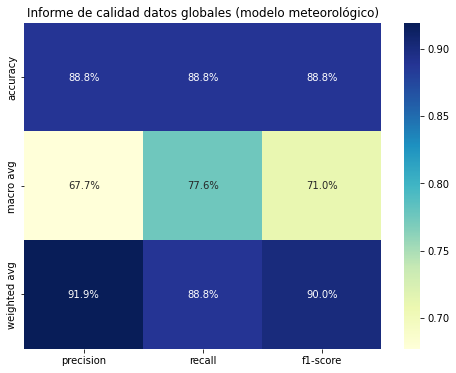

In [15]:
plt.figure(figsize=(8, 6))
plt.title("Informe de calidad datos globales (modelo meteorológico)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

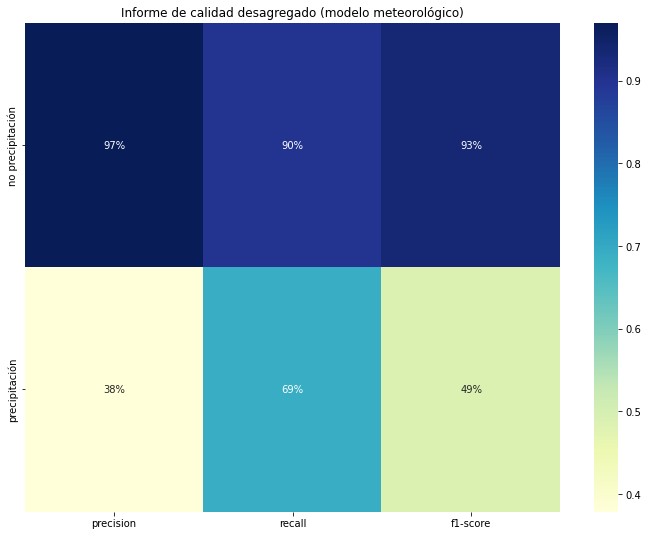

In [16]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Informe de calidad desagregado (modelo meteorológico)")
cr=pd.DataFrame(classification_report(df_all4k.prec_l, df_all4k.prec1_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');

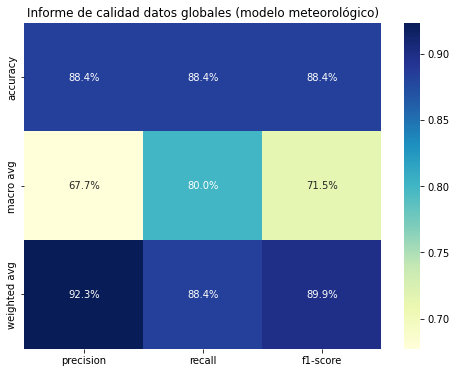

In [12]:
plt.figure(figsize=(8, 6))
plt.title("Informe de calidad datos globales (modelo meteorológico)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

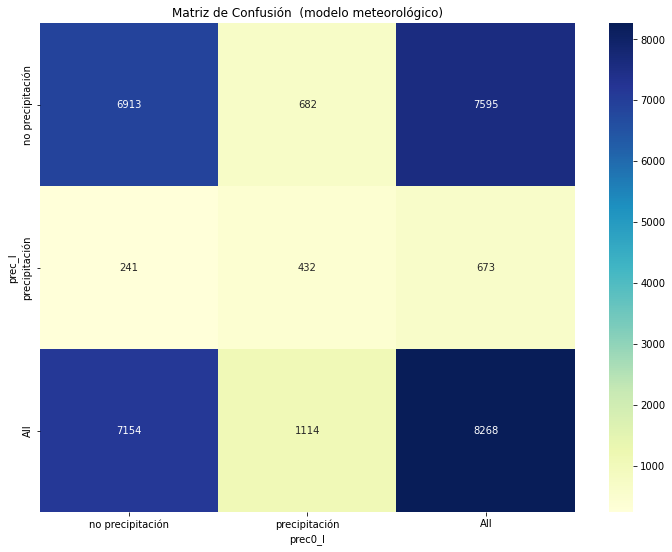

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Matriz de Confusión  (modelo meteorológico)")
global_sc=pd.crosstab(df_all4k.prec_l, df_all4k.prec0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

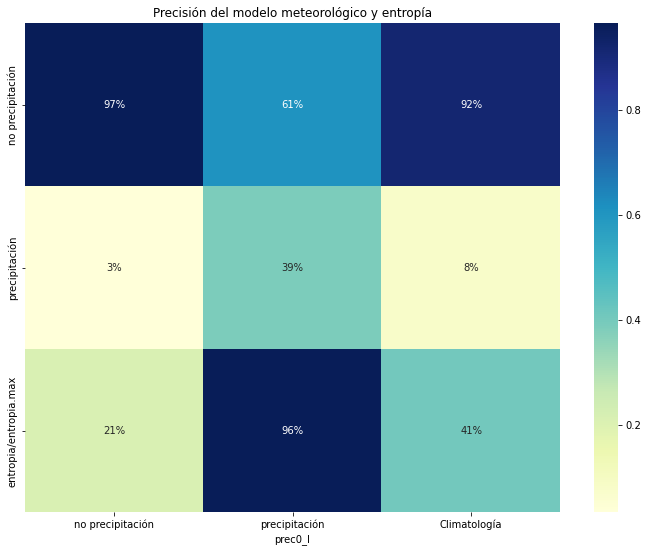

In [18]:
import math
from scipy.stats import entropy

plt.figure(figsize=(12, 9))
plt.title("Precisión del modelo meteorológico y entropía")
column_sc=pd.crosstab(df_all4k.prec_l, df_all4k.prec0_l, margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropia/entropia.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatología"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**Forecast D0**

In [19]:
#ria forecast d1
ria_model4k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/meteorological_models/lat42.39707lon-8.69362p4R4KmD0.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
ria_model4k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,lwflx0,conv_prec0,prec0,swflx0,shflx0,cape0,cin0,cfh0,cfl0,cfm0,cft0,HGT5000,HGT8500,T5000,T8500,dir1,snow_prec1,snowlevel1,mod1,wind_gust1,mslp1,temp1,rh1,visibility1,lhflx1,lwflx1,conv_prec1,prec1,swflx1,shflx1,...,lwflx2,conv_prec2,prec2,swflx2,shflx2,cape2,cin2,cfh2,cfl2,cfm2,cft2,HGT5002,HGT8502,T5002,T8502,dir3,snow_prec3,snowlevel3,mod3,wind_gust3,mslp3,temp3,rh3,visibility3,lhflx3,lwflx3,conv_prec3,prec3,swflx3,shflx3,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-03-11 01:00:00,192.077499,0.0,1877.740601,4.798375,9.306268,102338.703125,285.157867,0.965328,24038.736328,3.788113,337.612579,0.0,0.000,0.0,-42.493263,8.336000,-7.268941,0.648438,0.500000,0.0,0.648438,5691.722168,1522.435059,259.264252,278.276550,195.556091,0.0,1874.768677,6.801309,9.906267,102325.257812,286.462860,0.919328,24038.736328,20.688114,323.512573,0.0,0.000,0.0,-2.393262,...,367.212585,0.0,0.0363,0.0,-33.793262,7.823000,-6.140942,0.656250,0.500000,0.0,0.656250,5694.390137,1526.000977,259.237244,278.056549,202.124481,0.0,1833.281372,5.453736,9.406267,102325.843750,285.319885,0.971028,24038.736328,5.688113,365.712585,0.0,0.0586,0.0,-33.093262,11.916000,-1.798941,0.578125,0.507812,0.0,0.578125,5690.290039,1520.692993,259.247253,277.836548
2021-03-11 02:00:00,198.954941,0.0,1836.123657,5.095545,10.389208,102306.968750,285.449371,0.949313,24232.718750,10.659780,366.694489,0.0,0.000,0.0,-40.728905,11.566000,-5.764395,0.593750,0.515625,0.0,0.593750,5685.392090,1519.151978,259.172241,277.885223,202.938126,0.0,1836.070068,7.556779,10.589209,102293.132812,286.555389,0.916813,24232.718750,22.659779,358.794495,0.0,0.012,0.0,-4.128906,...,368.694489,0.0,0.0727,0.0,-32.528908,15.534000,-5.402394,0.625000,0.601562,0.0,0.625000,5688.104004,1522.920044,259.155243,277.585236,206.691650,0.0,1791.340576,6.289461,10.189208,102294.031250,285.429382,0.971013,24232.718750,7.359779,366.694489,0.0,0.1944,0.0,-35.728905,21.313999,-0.894395,0.515625,0.671875,0.0,0.671875,5683.967773,1517.604004,259.143250,277.445221
2021-03-11 03:00:00,205.966797,0.0,1764.601929,5.489675,10.566444,102250.140625,285.591003,0.940005,24232.691406,14.975504,366.495911,0.0,0.007,0.0,-44.423439,21.691999,-7.006910,0.437500,0.773438,0.0,0.773438,5674.395996,1513.625000,259.104736,277.188232,207.699661,0.0,1773.197021,7.946136,10.866445,102239.062500,286.606995,0.912505,24232.691406,24.575504,369.895905,0.0,0.049,0.0,-5.223437,...,369.295898,0.0,0.1250,0.0,-34.023438,21.129999,-7.029910,0.390625,0.742188,0.0,0.742188,5676.936035,1517.454956,259.128754,277.168243,211.598343,0.0,1746.845703,6.686860,10.566444,102236.960938,285.514008,0.964905,24232.691406,10.375504,366.895905,0.0,0.2220,0.0,-38.823437,29.393999,-2.668910,0.312500,0.765625,0.0,0.765625,5672.724121,1512.249023,259.113739,277.008240
2021-03-11 04:00:00,215.598099,0.0,1729.887085,5.935259,10.595257,102268.507812,285.691986,0.940043,24234.199219,16.794680,367.735779,0.0,0.113,0.0,-46.443016,27.090000,-2.414531,0.200000,0.757812,0.0,0.757812,5667.725098,1514.982056,259.110687,276.839478,214.544891,0.0,1759.239746,8.226570,11.295257,102255.250000,286.542999,0.925143,19634.199219,22.594679,371.535797,0.0,0.267,0.0,-4.443017,...,371.235779,0.0,0.3870,0.0,-29.143017,26.660000,-1.874531,0.148438,0.843750,0.0,0.843750,5670.225098,1518.848022,259.186676,277.079498,216.822723,0.0,1736.616821,6.965799,10.595257,102252.312500,285.477997,0.976543,16034.199219,7.194679,369.535797,0.0,0.4920,0.0,-31.843018,34.730000,-0.046531,0.140625,0.937500,0.0,0.937500,5665.953125,1513.197998,259.174683,276.889496
2021-03-11 05:00:00,221.110214,0.0,1795.988892,5.966084,11.151688,102295.000000,285.659882,0.952087,24233.667969,13.455339,366.459778,0.0,0.238,0.0,-39.178051,41.049999,-0.648668,0.234375,0.531250,0.0,0.531250,5661.662109,1514.442993,259.005371,277.528931,218.577682,0.0,1820.474

In [20]:
#label meteorological model prec points 0 , 1, 2 and 3
ria_model4k["prec0_l"]=pd.cut(ria_model4k["prec0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["prec1_l"]=pd.cut(ria_model4k["prec1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["prec2_l"]=pd.cut(ria_model4k["prec2"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["prec3_l"]=pd.cut(ria_model4k["prec3"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
df_all4k=pd.concat([station,ria_model4k],axis=1).dropna()
df_all4k=df_all4k.drop(columns=["prec"])
df_all4k[["prec_l","prec0_l","prec1_l","prec2_l","prec3_l"]].sample(20)

,prec_l,prec0_l,prec1_l,prec2_l,prec3_l
time,,,,,
2021-03-26 14:00:00,no precipitación,no precipitación,no precipitación,no precipitación,no precipitación
2021-08-20 17:00:00,no precipitación,no precipitación,no precipitación,no precipitación,no precipitación
2021-05-01 11:00:00,no precipitación,no precipitación,no precipitación,no precipitación,no precipitación
2021-06-16 10:00:00,no precipitación,no precipitación,no precipitación,no precipitación,no precipitación
2021-10-21 23:00:00,no precipitación,no precipitación,no precipitación,no precipitación,no precipitación
2021-05-20 05:00:00,no precipitación,no precipitación,no precipitación,no precipitación,no precipitación
2022-02-17 15:00:00,no precipitación,no precipitación,no precipitación,no precipitación,no precipitación
2021-05-10 19:00:00,no precipitación,precipitación,precipitación,precipitación,precipitación
2021-07-03 07:00:00,no precipitación,no precipitación,no precipitación,precipitación,precipitación


In [23]:
#compare model points and stations
print("station:\n",df_all4k["prec_l"].value_counts())
print("model point0:\n",df_all4k["prec0_l"].value_counts())
print("model point1:\n",df_all4k["prec1_l"].value_counts())
print("model point2:\n",df_all4k["prec2_l"].value_counts())
print("model point3:\n",df_all4k["prec3_l"].value_counts())

station:
 no precipitación    7292
precipitación        653
Name: prec_l, dtype: int64
model point0:
 no precipitación    6983
precipitación        962
Name: prec0_l, dtype: int64
model point1:
 no precipitación    6920
precipitación       1025
Name: prec1_l, dtype: int64
model point2:
 no precipitación    6873
precipitación       1072
Name: prec2_l, dtype: int64
model point3:
 no precipitación    6765
precipitación       1180
Name: prec3_l, dtype: int64


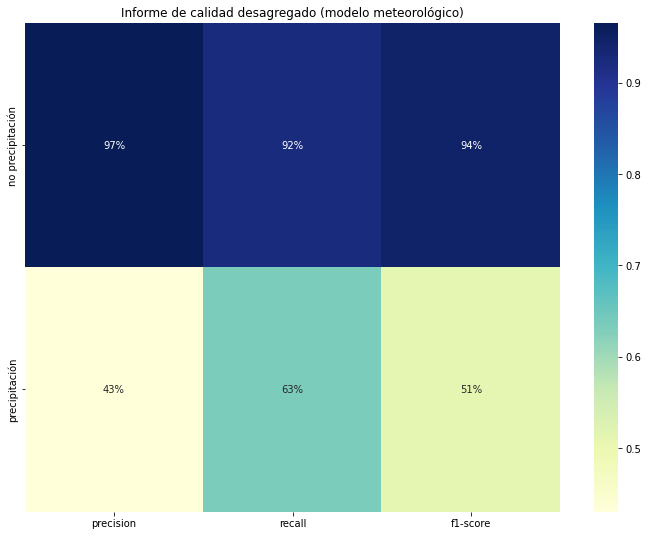

In [21]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("Informe de calidad desagregado (modelo meteorológico)")
import seaborn as sns
cr=pd.DataFrame(classification_report(df_all4k.prec_l, df_all4k.prec0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


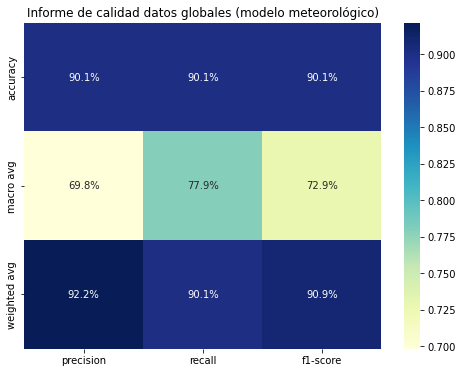

In [22]:
plt.figure(figsize=(8, 6))
plt.title("Informe de calidad datos globales (modelo meteorológico)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

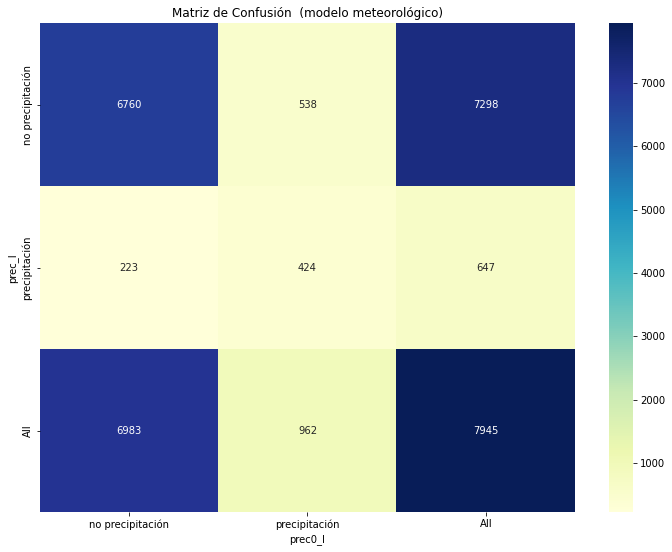

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Matriz de Confusión  (modelo meteorológico)")
global_sc=pd.crosstab(df_all4k.prec_l, df_all4k.prec0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

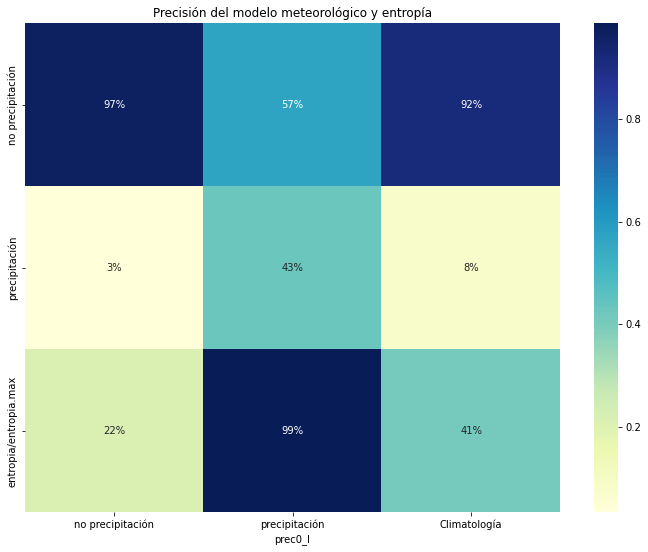

In [24]:
import math
from scipy.stats import entropy

plt.figure(figsize=(12, 9))
plt.title("Precisión del modelo meteorológico y entropía")
column_sc=pd.crosstab(df_all4k.prec_l, df_all4k.prec0_l, margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropia/entropia.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatología"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

In [43]:
from pycaret.classification import *
clas = setup(df_all4k.drop(columns=["prec0_l","prec1_l","prec2_l","prec3_l"]),target = 'prec_l',
             session_id=20,normalize=False ,train_size=.85,remove_multicollinearity=False,
             fix_imbalance=False,ignore_low_variance=True,feature_selection=True,
             feature_selection_threshold =.15,pca=False,polynomial_features=False,
             trigonometry_features=False,feature_interaction=False)

,Description,Value
0,session_id,20
1,Target,prec_l
2,Target Type,Binary
3,Label Encoded,"no precipitación: 0, precipitación: 1"
4,Original Data,"(8268, 101)"
5,Missing Values,False
6,Numeric Features,100
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [44]:
compare_models(fold=5,sort="F1")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9364,0.9353,0.4163,0.6728,0.5137,0.4816,0.4979,0.404
lda,Linear Discriminant Analysis,0.9256,0.9074,0.4409,0.5485,0.4885,0.4489,0.4522,0.042
rf,Random Forest Classifier,0.9370,0.9315,0.3652,0.7152,0.4821,0.4524,0.4822,1.374
et,Extra Trees Classifier,0.9365,0.9354,0.3545,0.7164,0.4739,0.4443,0.4758,0.770
nb,Naive Bayes,0.8756,0.8879,0.6402,0.3520,0.4538,0.3904,0.4129,0.024
gbc,Gradient Boosting Classifier,0.9304,0.9237,0.3580,0.6237,0.4537,0.4194,0.4386,2.358
qda,Quadratic Discriminant Analysis,0.8973,0.8927,0.5168,0.3956,0.4480,0.3925,0.3968,0.028
dt,Decision Tree Classifier,0.9092,0.7021,0.4552,0.4387,0.4461,0.3968,0.3972,0.106
ada,Ada Boost Classifier,0.9230,0.9119,0.3632,0.5386,0.4319,0.3924,0.4022,0.592
knn,K Neighbors Classifier,0.9273,0.8529,0.3175,0.5934,0.4124,0.3776,0.3992,0.178


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=20, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [45]:
model=create_model("lightgbm",n_estimators=250,fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9346,0.9350,0.3333,0.7037,0.4524,0.4223,0.4559
1,0.9360,0.9278,0.4737,0.6429,0.5455,0.5119,0.5188
2,0.9474,0.9481,0.4912,0.7778,0.6022,0.5755,0.5930
3,0.9317,0.9299,0.3684,0.6364,0.4667,0.4330,0.4515
4,0.9417,0.9498,0.3684,0.8077,0.5060,0.4796,0.5217
5,0.9531,0.9426,0.5614,0.8000,0.6598,0.6354,0.6469
6,0.9246,0.9310,0.4035,0.5476,0.4646,0.4251,0.4308
7,0.9373,0.9457,0.3393,0.7308,0.4634,0.4348,0.4712
8,0.9416,0.9436,0.5179,0.6744,0.5859,0.5550,0.5606
9,0.9316,0.9383,0.3393,0.6333,0.4419,0.4090,0.4317


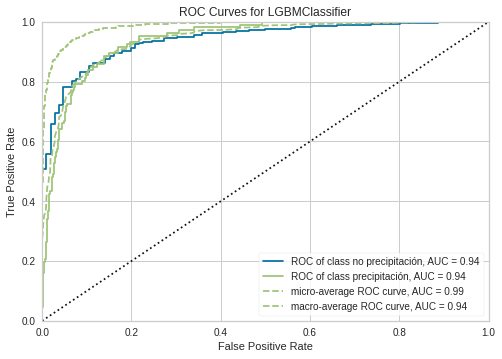

In [46]:
plot_model(model, plot = 'auc')

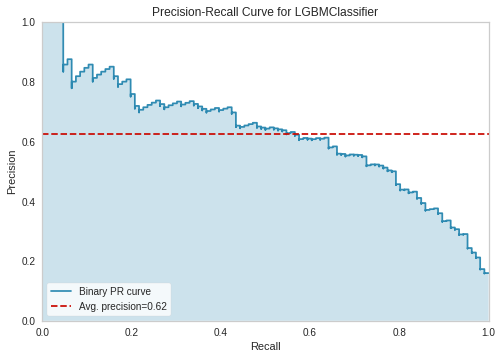

In [47]:
plot_model(model, plot = 'pr')

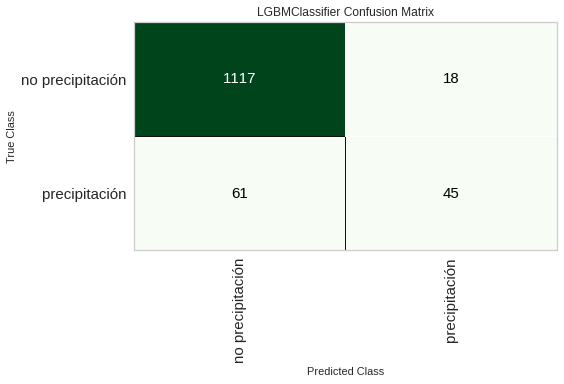

In [48]:
plot_model(model,'confusion_matrix')

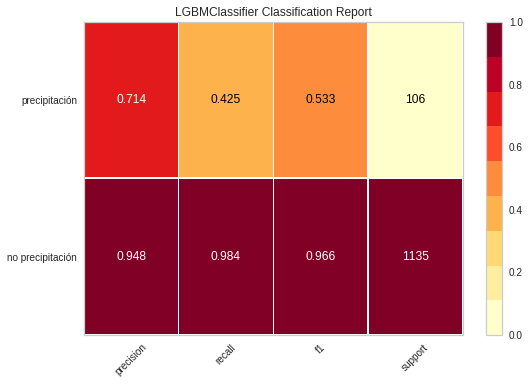

In [49]:
plot_model(model,'class_report')

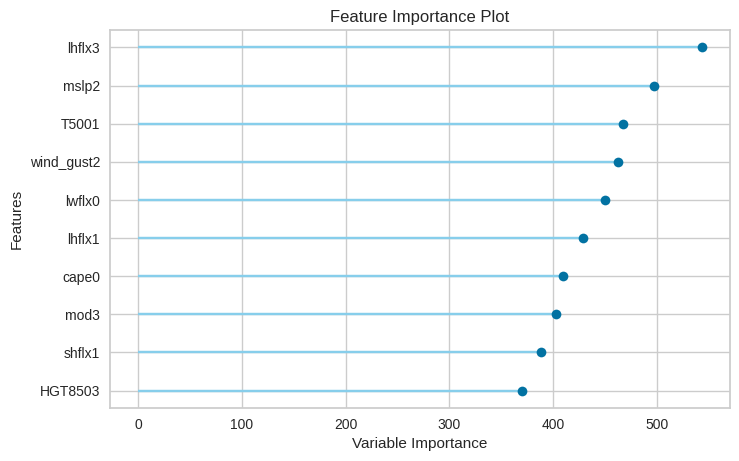

In [50]:
plot_model(model,"feature")

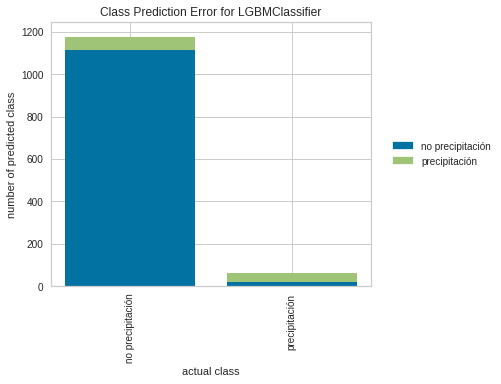

In [51]:
plot_model(model,"error")

**Export model**

In [52]:
x_var=get_config("X_train").columns
x_var

Index(['prec1', 'shflx1', 'cft0', 'lwflx0', 'prec2', 'cft3', 'cfl3', 'cfl1',
       'cft1', 'prec0', 'lhflx1', 'cfl0', 'lhflx3', 'snowlevel1', 'mslp2',
       'T5001', 'HGT8503', 'cape0', 'prec3', 'cft2', 'wind_gust2', 'cfl2',
       'mod3'],
      dtype='object')

In [53]:

Y=df_all4k.prec_l
X=df_all4k[x_var]

In [54]:
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, random_state=1)
ml_model=LGBMClassifier(n_estimators=250).fit(X_train,y_train)

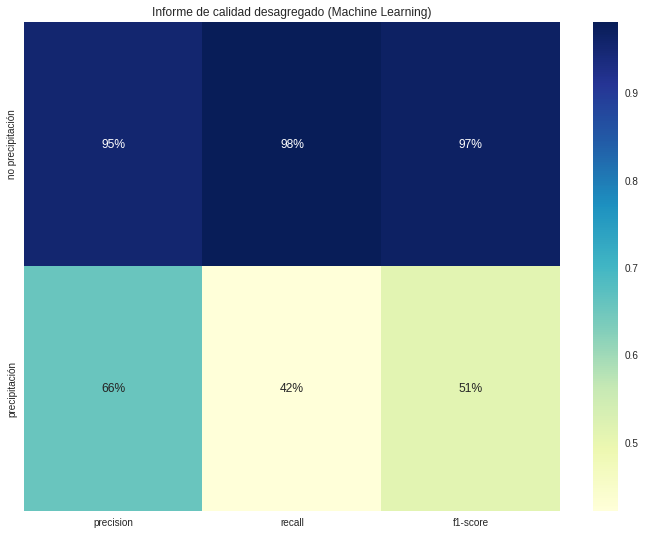

In [55]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

cr=pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
plt.figure(figsize=(12, 9))
plt.title("Informe de calidad desagregado (Machine Learning)")
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


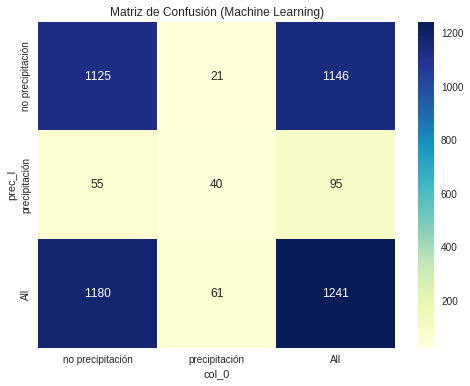

In [56]:
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.title("Matriz de Confusión (Machine Learning)")
global_sc=pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

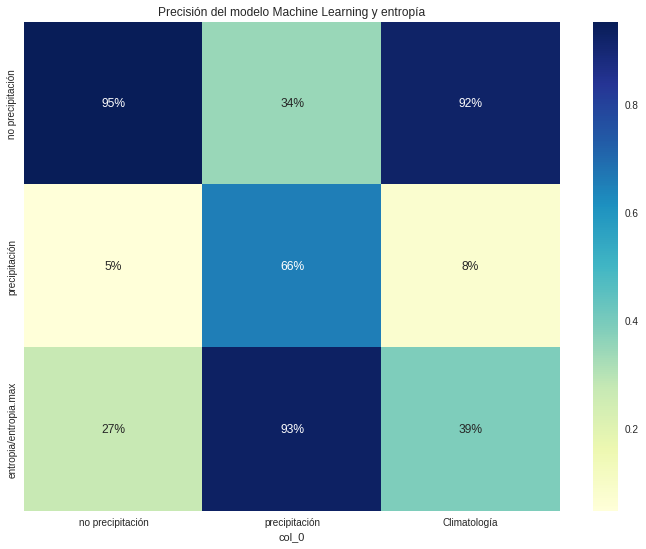

In [59]:
import math
from scipy.stats import entropy

plt.figure(figsize=(12, 9))
plt.title("Precisión del modelo Machine Learning y entropía")
column_sc=pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropia/entropia.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatología"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

In [58]:
import pickle
model_dict={"x_var":x_var,"ml_model":ml_model,"coor":coor}
pickle.dump(model_dict, open("prec_mar_d1.al", 'wb'))

In [ ]:
pd.DataFrame(ml_model.predict_proba(X_test),columns=["no p","precipitación"])["precipitación"].map(lambda n: '{:.0%}'.format(n))

0      13%
1       0%
2       2%
3       9%
4       5%
      ... 
822     1%
823     9%
824    53%
825     0%
826     0%
Name: precipitación, Length: 827, dtype: object